In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
%matplotlib inline

In [2]:
from differentially_private_LogisticRegression import LogisticRegression

In [3]:
data1=pd.read_csv("data/mnist_train.csv")
data2=pd.read_csv("data/mnist_test.csv")
data=pd.concat([data1,data2])

data3=data.loc[data['label']==5]  # binary classifier, only choosing 5 and 8
data4=data.loc[data['label']==8]
data=pd.concat([data3,data4])
data.shape, data.label.unique()

((13138, 785), array([5, 8]))

In [4]:
X = data.iloc[:,1:].to_numpy()/255
Y = data.iloc[:,0].to_numpy()//8
x, xt, y, yt = train_test_split(X, Y, test_size=0.2, random_state=9)

In [5]:
#differentially_private: Enabled
lr_clf  = LogisticRegression(x, y ,alpha=.1, differentially_private=True)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, _,_ = lr_clf.predict(xt,yt)
print("Accuracy: ",accuracy)

100%|██████████| 100/100 [00:01<00:00, 68.58it/s]

Stats: Iterations 100, Train-Loss:  0.20137239375880317, CV-Loss:  0.2046405303910798
Accuracy:  0.943683409436834


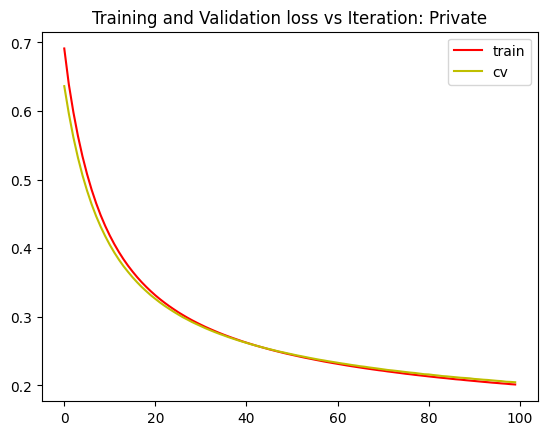

In [6]:
#Training and Validation loss vs Iteration: Private

plt.plot(train_history, 'r', label='train')
plt.plot(cv_history, 'y', label='cv')
plt.title("Training and Validation loss vs Iteration: Private")
plt.legend(loc=0)
plt.show()

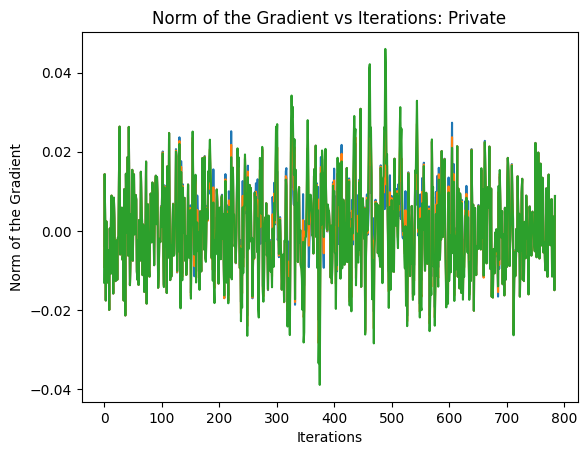

In [7]:
#Norm of the Gradient vs Iterations: Private 

plt.plot(theta_history[:][0])
plt.plot(theta_history[:][1])
plt.plot(theta_history[:][2])
plt.xlabel("Iterations")
plt.ylabel("Norm of the Gradient")
plt.title("Norm of the Gradient vs Iterations: Private")
plt.show()

In [8]:
#differentially_private: Disabled
lr_clf_np  = LogisticRegression(x, y ,alpha=.1, differentially_private=False)
theta, train_history, cv_history, theta_history = lr_clf_np.fit(verbose=False)
accuracy, _,_ = lr_clf_np.predict(xt,yt)
print("Accuracy: ",accuracy)

100%|██████████| 100/100 [00:00<00:00, 115.51it/s]

Stats: Iterations 100, Train-Loss:  0.20157251519204786, CV-Loss:  0.2045709629733286
Accuracy:  0.9440639269406392


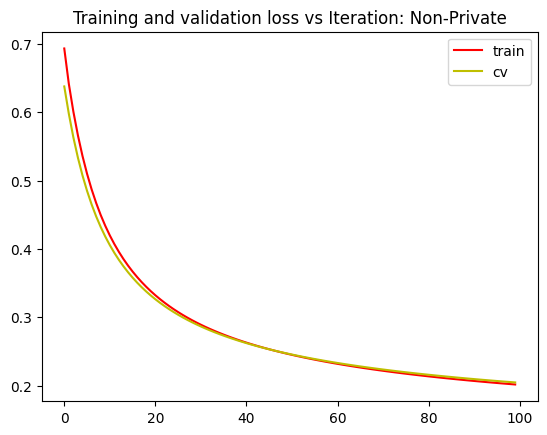

In [9]:
# Training and validation loss vs Iteration: Non-Private

plt.plot(train_history, 'r', label='train')
plt.plot(cv_history, 'y', label='cv')
plt.title("Training and validation loss vs Iteration: Non-Private")
plt.legend(loc=0)
plt.show()

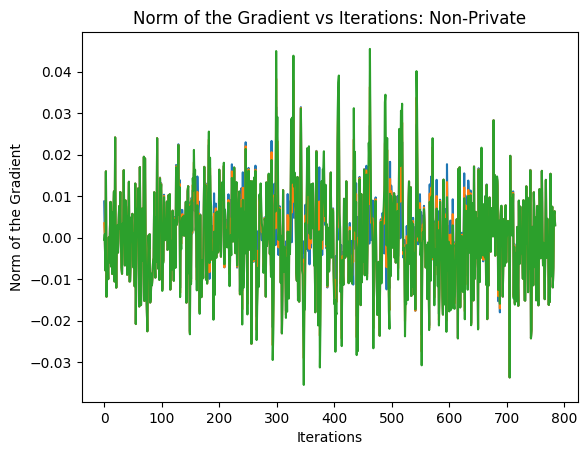

In [10]:
#Norm of the Gradient vs Iterations: Non-Private"

plt.plot(theta_history[:][0])
plt.plot(theta_history[:][1])
plt.plot(theta_history[:][2])
plt.xlabel("Iterations")
plt.ylabel("Norm of the Gradient")
plt.title("Norm of the Gradient vs Iterations: Non-Private")
plt.show()

#### Loss vs % of sample used in training

In [11]:
def loss_vs_sample(x, y, it = 100,iterations = 100,differentially_private = False):
    train_historys = []
    cv_historys = []
    for i in range(500,x.shape[0],x.shape[0]//it):

        idx = np.random.permutation([j for j in range(x.shape[0])])
        
        fl_clf = LogisticRegression(x[idx[:i]], y[idx[0:i]], 
                                        alpha=.1, iteration = iterations,
                                        differentially_private=differentially_private)

        theta, train_history, cv_history, theta_history = fl_clf.fit()
        
        train_historys.append(train_history[-1])
        cv_historys.append(cv_history[-1])
        
    return train_historys, cv_historys

In [12]:
train_historys, cv_historys = loss_vs_sample(x,y, differentially_private= True)

100%|██████████| 100/100 [00:00<00:00, 893.67it/s]


Stats: Iterations 100, Train-Loss:  0.1844696250318198, CV-Loss:  0.21385454653268213


100%|██████████| 100/100 [00:00<00:00, 790.68it/s]


Stats: Iterations 100, Train-Loss:  0.19167621044425306, CV-Loss:  0.18713196065608134


100%|██████████| 100/100 [00:00<00:00, 720.56it/s]


Stats: Iterations 100, Train-Loss:  0.16786634618550061, CV-Loss:  0.2022608079323215


100%|██████████| 100/100 [00:00<00:00, 644.43it/s]


Stats: Iterations 100, Train-Loss:  0.19800977683179083, CV-Loss:  0.20454751462646434


100%|██████████| 100/100 [00:00<00:00, 661.92it/s]


Stats: Iterations 100, Train-Loss:  0.18994515993784358, CV-Loss:  0.2485607274460616


100%|██████████| 100/100 [00:00<00:00, 609.02it/s]


Stats: Iterations 100, Train-Loss:  0.19708346061835189, CV-Loss:  0.23157104941490056


100%|██████████| 100/100 [00:00<00:00, 560.56it/s]


Stats: Iterations 100, Train-Loss:  0.19207204192511662, CV-Loss:  0.19633744136733183


100%|██████████| 100/100 [00:00<00:00, 484.47it/s]


Stats: Iterations 100, Train-Loss:  0.1869207637404195, CV-Loss:  0.18442071343248492


100%|██████████| 100/100 [00:00<00:00, 423.75it/s]


Stats: Iterations 100, Train-Loss:  0.19329260472552087, CV-Loss:  0.18270038469071553


100%|██████████| 100/100 [00:00<00:00, 467.46it/s]


Stats: Iterations 100, Train-Loss:  0.1872453099809503, CV-Loss:  0.19131752942286992


100%|██████████| 100/100 [00:00<00:00, 370.37it/s]


Stats: Iterations 100, Train-Loss:  0.22092358936708686, CV-Loss:  0.17421800153603453


100%|██████████| 100/100 [00:00<00:00, 385.75it/s]


Stats: Iterations 100, Train-Loss:  0.19274762576846557, CV-Loss:  0.19094755910607844


100%|██████████| 100/100 [00:00<00:00, 363.90it/s]


Stats: Iterations 100, Train-Loss:  0.1946331730903264, CV-Loss:  0.21656370883405407


100%|██████████| 100/100 [00:00<00:00, 350.04it/s]


Stats: Iterations 100, Train-Loss:  0.20344050064258823, CV-Loss:  0.19996457834850184


100%|██████████| 100/100 [00:00<00:00, 326.61it/s]


Stats: Iterations 100, Train-Loss:  0.19266936860944653, CV-Loss:  0.17724126560701037


100%|██████████| 100/100 [00:00<00:00, 293.13it/s]


Stats: Iterations 100, Train-Loss:  0.19193319053009206, CV-Loss:  0.18992061062237353


100%|██████████| 100/100 [00:00<00:00, 264.04it/s]


Stats: Iterations 100, Train-Loss:  0.20420632425833993, CV-Loss:  0.22824178932005912


100%|██████████| 100/100 [00:00<00:00, 255.73it/s]


Stats: Iterations 100, Train-Loss:  0.20722180734754472, CV-Loss:  0.16180244858270063


100%|██████████| 100/100 [00:00<00:00, 271.33it/s]


Stats: Iterations 100, Train-Loss:  0.19780042115309596, CV-Loss:  0.19763679644957924


100%|██████████| 100/100 [00:00<00:00, 266.94it/s]


Stats: Iterations 100, Train-Loss:  0.2015450918912236, CV-Loss:  0.22158845176128436


100%|██████████| 100/100 [00:00<00:00, 245.89it/s]


Stats: Iterations 100, Train-Loss:  0.18886575242898618, CV-Loss:  0.19933152632388582


100%|██████████| 100/100 [00:00<00:00, 251.98it/s]


Stats: Iterations 100, Train-Loss:  0.19937824420095762, CV-Loss:  0.2137298158882004


100%|██████████| 100/100 [00:00<00:00, 251.22it/s]


Stats: Iterations 100, Train-Loss:  0.18724401071795407, CV-Loss:  0.2119404760024672


100%|██████████| 100/100 [00:00<00:00, 227.08it/s]


Stats: Iterations 100, Train-Loss:  0.1899723509602273, CV-Loss:  0.21210040834620406


100%|██████████| 100/100 [00:00<00:00, 221.36it/s]


Stats: Iterations 100, Train-Loss:  0.20356194208460082, CV-Loss:  0.21218250605531885


100%|██████████| 100/100 [00:00<00:00, 211.59it/s]


Stats: Iterations 100, Train-Loss:  0.20411326230520527, CV-Loss:  0.20428282079567095


100%|██████████| 100/100 [00:00<00:00, 211.88it/s]


Stats: Iterations 100, Train-Loss:  0.19289927874977664, CV-Loss:  0.20819334606011922


100%|██████████| 100/100 [00:00<00:00, 196.02it/s]


Stats: Iterations 100, Train-Loss:  0.19680966148957726, CV-Loss:  0.18833159443215636


100%|██████████| 100/100 [00:00<00:00, 190.39it/s]


Stats: Iterations 100, Train-Loss:  0.20589148205039676, CV-Loss:  0.209382660259644


100%|██████████| 100/100 [00:00<00:00, 186.99it/s]


Stats: Iterations 100, Train-Loss:  0.19540176447613175, CV-Loss:  0.19730089463102282


100%|██████████| 100/100 [00:00<00:00, 169.01it/s]


Stats: Iterations 100, Train-Loss:  0.19559708164894088, CV-Loss:  0.22312369235756904


100%|██████████| 100/100 [00:00<00:00, 188.54it/s]


Stats: Iterations 100, Train-Loss:  0.1982966483322602, CV-Loss:  0.2116270534300172


100%|██████████| 100/100 [00:00<00:00, 179.41it/s]


Stats: Iterations 100, Train-Loss:  0.19917395888430522, CV-Loss:  0.19421120689656096


100%|██████████| 100/100 [00:00<00:00, 180.19it/s]


Stats: Iterations 100, Train-Loss:  0.20016176962229276, CV-Loss:  0.17644599058455698


100%|██████████| 100/100 [00:00<00:00, 166.76it/s]


Stats: Iterations 100, Train-Loss:  0.1940219355080345, CV-Loss:  0.19933456754735135


100%|██████████| 100/100 [00:00<00:00, 166.34it/s]


Stats: Iterations 100, Train-Loss:  0.19995522570592433, CV-Loss:  0.2013015285412885


100%|██████████| 100/100 [00:00<00:00, 161.48it/s]


Stats: Iterations 100, Train-Loss:  0.19436421988160849, CV-Loss:  0.19569808073712058


100%|██████████| 100/100 [00:00<00:00, 162.48it/s]


Stats: Iterations 100, Train-Loss:  0.20183786465906822, CV-Loss:  0.20077272328695175


100%|██████████| 100/100 [00:00<00:00, 158.37it/s]


Stats: Iterations 100, Train-Loss:  0.19073133612123797, CV-Loss:  0.19050995858613595


100%|██████████| 100/100 [00:00<00:00, 155.24it/s]


Stats: Iterations 100, Train-Loss:  0.1993267945789545, CV-Loss:  0.20383879637521035


100%|██████████| 100/100 [00:00<00:00, 151.55it/s]


Stats: Iterations 100, Train-Loss:  0.19743018479627605, CV-Loss:  0.21184602400575941


100%|██████████| 100/100 [00:00<00:00, 147.68it/s]


Stats: Iterations 100, Train-Loss:  0.2022451938433191, CV-Loss:  0.20532202843761904


100%|██████████| 100/100 [00:00<00:00, 142.09it/s]


Stats: Iterations 100, Train-Loss:  0.202937391667306, CV-Loss:  0.19386911788586433


100%|██████████| 100/100 [00:00<00:00, 137.07it/s]


Stats: Iterations 100, Train-Loss:  0.19448318964045863, CV-Loss:  0.19092233993749466


100%|██████████| 100/100 [00:00<00:00, 139.61it/s]


Stats: Iterations 100, Train-Loss:  0.20076705731628702, CV-Loss:  0.19708043515995338


100%|██████████| 100/100 [00:00<00:00, 139.54it/s]


Stats: Iterations 100, Train-Loss:  0.19805012528397806, CV-Loss:  0.20970737558437513


100%|██████████| 100/100 [00:00<00:00, 126.90it/s]


Stats: Iterations 100, Train-Loss:  0.20513085480483143, CV-Loss:  0.19226935799384767


100%|██████████| 100/100 [00:00<00:00, 130.31it/s]


Stats: Iterations 100, Train-Loss:  0.20633728769972567, CV-Loss:  0.19906453226297371


100%|██████████| 100/100 [00:00<00:00, 122.41it/s]


Stats: Iterations 100, Train-Loss:  0.1935873023945772, CV-Loss:  0.2081352754674228


100%|██████████| 100/100 [00:00<00:00, 127.75it/s]


Stats: Iterations 100, Train-Loss:  0.19730988696832588, CV-Loss:  0.21242512278981043


100%|██████████| 100/100 [00:00<00:00, 125.17it/s]


Stats: Iterations 100, Train-Loss:  0.2053209398556898, CV-Loss:  0.2309144009977545


100%|██████████| 100/100 [00:00<00:00, 122.11it/s]


Stats: Iterations 100, Train-Loss:  0.20080943602805298, CV-Loss:  0.20829144692457274


100%|██████████| 100/100 [00:00<00:00, 120.12it/s]


Stats: Iterations 100, Train-Loss:  0.18964591261063854, CV-Loss:  0.2012033094253558


100%|██████████| 100/100 [00:00<00:00, 116.35it/s]


Stats: Iterations 100, Train-Loss:  0.19122992599814712, CV-Loss:  0.22931609449225612


100%|██████████| 100/100 [00:00<00:00, 116.83it/s]


Stats: Iterations 100, Train-Loss:  0.19873407396362644, CV-Loss:  0.1905096716145544


100%|██████████| 100/100 [00:00<00:00, 115.79it/s]


Stats: Iterations 100, Train-Loss:  0.20113717172412357, CV-Loss:  0.18129581806806108


100%|██████████| 100/100 [00:00<00:00, 110.82it/s]


Stats: Iterations 100, Train-Loss:  0.20043935340926947, CV-Loss:  0.19281794184251488


100%|██████████| 100/100 [00:00<00:00, 111.62it/s]


Stats: Iterations 100, Train-Loss:  0.20076880426845325, CV-Loss:  0.2066852809152646


100%|██████████| 100/100 [00:00<00:00, 107.86it/s]


Stats: Iterations 100, Train-Loss:  0.1977014968009374, CV-Loss:  0.22218363540133138


100%|██████████| 100/100 [00:00<00:00, 108.80it/s]


Stats: Iterations 100, Train-Loss:  0.19788193381374436, CV-Loss:  0.20679721243216778


100%|██████████| 100/100 [00:00<00:00, 104.68it/s]


Stats: Iterations 100, Train-Loss:  0.20337374096533495, CV-Loss:  0.2105376101084812


100%|██████████| 100/100 [00:00<00:00, 104.56it/s]


Stats: Iterations 100, Train-Loss:  0.20132776957082146, CV-Loss:  0.21797388619348795


100%|██████████| 100/100 [00:00<00:00, 103.61it/s]


Stats: Iterations 100, Train-Loss:  0.2052083308750514, CV-Loss:  0.21522972038059962


100%|██████████| 100/100 [00:00<00:00, 101.55it/s]


Stats: Iterations 100, Train-Loss:  0.20302861764237867, CV-Loss:  0.19937716909434522


100%|██████████| 100/100 [00:01<00:00, 96.53it/s]


Stats: Iterations 100, Train-Loss:  0.20591356455961213, CV-Loss:  0.22725974616591244


100%|██████████| 100/100 [00:01<00:00, 98.96it/s]


Stats: Iterations 100, Train-Loss:  0.19810679723659677, CV-Loss:  0.22035281093754125


100%|██████████| 100/100 [00:01<00:00, 97.69it/s]


Stats: Iterations 100, Train-Loss:  0.19609460664606387, CV-Loss:  0.2136743732033418


100%|██████████| 100/100 [00:01<00:00, 95.08it/s]


Stats: Iterations 100, Train-Loss:  0.19919062381730301, CV-Loss:  0.20569790854257178


100%|██████████| 100/100 [00:01<00:00, 95.53it/s]


Stats: Iterations 100, Train-Loss:  0.19917335423754934, CV-Loss:  0.19752118573553581


100%|██████████| 100/100 [00:01<00:00, 93.69it/s]


Stats: Iterations 100, Train-Loss:  0.20331044299106563, CV-Loss:  0.2081174379638594


100%|██████████| 100/100 [00:01<00:00, 92.97it/s]


Stats: Iterations 100, Train-Loss:  0.2037209926934438, CV-Loss:  0.19453887865613434


100%|██████████| 100/100 [00:01<00:00, 88.81it/s]


Stats: Iterations 100, Train-Loss:  0.2036153017642439, CV-Loss:  0.20172673776782354


100%|██████████| 100/100 [00:01<00:00, 86.99it/s]


Stats: Iterations 100, Train-Loss:  0.20033972791434118, CV-Loss:  0.1936313455921339


100%|██████████| 100/100 [00:01<00:00, 88.48it/s]


Stats: Iterations 100, Train-Loss:  0.19889480785312513, CV-Loss:  0.19368816361625926


100%|██████████| 100/100 [00:01<00:00, 88.34it/s]


Stats: Iterations 100, Train-Loss:  0.20328312531486314, CV-Loss:  0.20521435480497296


100%|██████████| 100/100 [00:01<00:00, 85.87it/s]


Stats: Iterations 100, Train-Loss:  0.20195652168886427, CV-Loss:  0.19370189696144427


100%|██████████| 100/100 [00:01<00:00, 85.76it/s]


Stats: Iterations 100, Train-Loss:  0.1986254409593663, CV-Loss:  0.19891697056372074


100%|██████████| 100/100 [00:01<00:00, 84.76it/s]


Stats: Iterations 100, Train-Loss:  0.20330063864180775, CV-Loss:  0.2012638014481485


100%|██████████| 100/100 [00:01<00:00, 83.09it/s]


Stats: Iterations 100, Train-Loss:  0.20147464001590504, CV-Loss:  0.20660022307858877


100%|██████████| 100/100 [00:01<00:00, 80.52it/s]


Stats: Iterations 100, Train-Loss:  0.19836126441960436, CV-Loss:  0.2105081398589461


100%|██████████| 100/100 [00:01<00:00, 81.76it/s]


Stats: Iterations 100, Train-Loss:  0.20230012629884592, CV-Loss:  0.21020860558026466


100%|██████████| 100/100 [00:01<00:00, 81.19it/s]


Stats: Iterations 100, Train-Loss:  0.1992855899466689, CV-Loss:  0.20798757602202464


100%|██████████| 100/100 [00:01<00:00, 80.58it/s]


Stats: Iterations 100, Train-Loss:  0.19916065873772382, CV-Loss:  0.21157061460029217


100%|██████████| 100/100 [00:01<00:00, 78.30it/s]


Stats: Iterations 100, Train-Loss:  0.20101529739477628, CV-Loss:  0.20187344693878886


100%|██████████| 100/100 [00:01<00:00, 79.09it/s]


Stats: Iterations 100, Train-Loss:  0.20337302858561854, CV-Loss:  0.20358972796420907


100%|██████████| 100/100 [00:01<00:00, 76.10it/s]


Stats: Iterations 100, Train-Loss:  0.20138728665682024, CV-Loss:  0.20582007339612116


100%|██████████| 100/100 [00:01<00:00, 76.96it/s]


Stats: Iterations 100, Train-Loss:  0.2033771049883434, CV-Loss:  0.19847237413528943


100%|██████████| 100/100 [00:01<00:00, 76.18it/s]


Stats: Iterations 100, Train-Loss:  0.20107246325827324, CV-Loss:  0.20868099385221361


100%|██████████| 100/100 [00:01<00:00, 75.46it/s]


Stats: Iterations 100, Train-Loss:  0.1997353575826395, CV-Loss:  0.22250611106044296


100%|██████████| 100/100 [00:01<00:00, 74.32it/s]


Stats: Iterations 100, Train-Loss:  0.19785995700083292, CV-Loss:  0.20966825443380907


100%|██████████| 100/100 [00:01<00:00, 71.87it/s]


Stats: Iterations 100, Train-Loss:  0.20433213968552422, CV-Loss:  0.19047371296910753


100%|██████████| 100/100 [00:01<00:00, 70.35it/s]


Stats: Iterations 100, Train-Loss:  0.2002833932541533, CV-Loss:  0.2133512012431236


100%|██████████| 100/100 [00:01<00:00, 72.20it/s]


Stats: Iterations 100, Train-Loss:  0.20249149679604286, CV-Loss:  0.19400747370652402


100%|██████████| 100/100 [00:01<00:00, 71.25it/s]


Stats: Iterations 100, Train-Loss:  0.2033386581536111, CV-Loss:  0.20285212010371875


100%|██████████| 100/100 [00:01<00:00, 71.47it/s]


Stats: Iterations 100, Train-Loss:  0.20344820279921771, CV-Loss:  0.189379981034042


100%|██████████| 100/100 [00:01<00:00, 70.63it/s]

Stats: Iterations 100, Train-Loss:  0.20268138243637962, CV-Loss:  0.19635602687802226


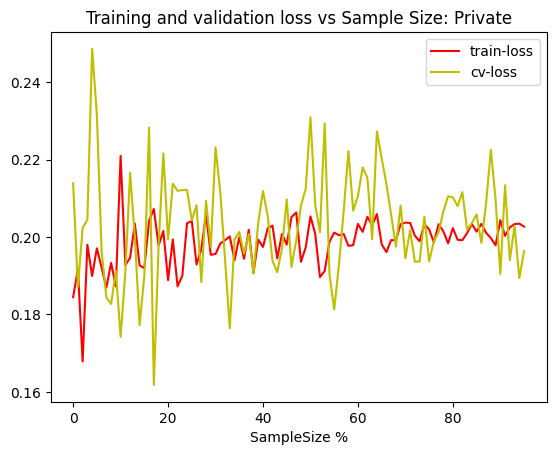

In [13]:
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Sample Size: Private")
plt.xlabel('SampleSize %')
plt.legend(loc=0)
plt.show()

In [14]:
train_historys, cv_historys = loss_vs_sample(x,y)

100%|██████████| 100/100 [00:00<00:00, 1131.85it/s]


Stats: Iterations 100, Train-Loss:  0.1706866247578502, CV-Loss:  0.17582228164382668


100%|██████████| 100/100 [00:00<00:00, 1204.81it/s]


Stats: Iterations 100, Train-Loss:  0.17514660135017374, CV-Loss:  0.20193939085661716


100%|██████████| 100/100 [00:00<00:00, 1135.00it/s]


Stats: Iterations 100, Train-Loss:  0.1652018023224709, CV-Loss:  0.23071310857045252


100%|██████████| 100/100 [00:00<00:00, 937.06it/s]


Stats: Iterations 100, Train-Loss:  0.18751157418105424, CV-Loss:  0.2494406240449701


100%|██████████| 100/100 [00:00<00:00, 994.68it/s]


Stats: Iterations 100, Train-Loss:  0.20419861587110813, CV-Loss:  0.19064601532715822


100%|██████████| 100/100 [00:00<00:00, 923.48it/s]


Stats: Iterations 100, Train-Loss:  0.1947196250190086, CV-Loss:  0.194250293433702


100%|██████████| 100/100 [00:00<00:00, 769.74it/s]


Stats: Iterations 100, Train-Loss:  0.21875838256925983, CV-Loss:  0.22291680046001378


100%|██████████| 100/100 [00:00<00:00, 840.89it/s]


Stats: Iterations 100, Train-Loss:  0.20279008806026705, CV-Loss:  0.18919500958511432


100%|██████████| 100/100 [00:00<00:00, 864.75it/s]


Stats: Iterations 100, Train-Loss:  0.18245157238491652, CV-Loss:  0.1937071088510675


100%|██████████| 100/100 [00:00<00:00, 813.18it/s]


Stats: Iterations 100, Train-Loss:  0.18796369896368575, CV-Loss:  0.15536002457768408


100%|██████████| 100/100 [00:00<00:00, 550.28it/s]


Stats: Iterations 100, Train-Loss:  0.19087159459760672, CV-Loss:  0.20790077805351587


100%|██████████| 100/100 [00:00<00:00, 656.45it/s]


Stats: Iterations 100, Train-Loss:  0.19327106040809164, CV-Loss:  0.20237993834753745


100%|██████████| 100/100 [00:00<00:00, 641.53it/s]


Stats: Iterations 100, Train-Loss:  0.20400828616257183, CV-Loss:  0.20749040658741094


100%|██████████| 100/100 [00:00<00:00, 595.07it/s]


Stats: Iterations 100, Train-Loss:  0.20204560052432868, CV-Loss:  0.1900058094559817


100%|██████████| 100/100 [00:00<00:00, 553.12it/s]


Stats: Iterations 100, Train-Loss:  0.21067198877149237, CV-Loss:  0.1894682625888403


100%|██████████| 100/100 [00:00<00:00, 600.37it/s]


Stats: Iterations 100, Train-Loss:  0.1906224000818761, CV-Loss:  0.21888730158736888


100%|██████████| 100/100 [00:00<00:00, 601.18it/s]


Stats: Iterations 100, Train-Loss:  0.18662339351752108, CV-Loss:  0.21635036699509866


100%|██████████| 100/100 [00:00<00:00, 567.61it/s]


Stats: Iterations 100, Train-Loss:  0.1954664676557959, CV-Loss:  0.18869432281166526


100%|██████████| 100/100 [00:00<00:00, 381.99it/s]


Stats: Iterations 100, Train-Loss:  0.19516625869209464, CV-Loss:  0.22500136706852686


100%|██████████| 100/100 [00:00<00:00, 429.06it/s]


Stats: Iterations 100, Train-Loss:  0.20186607241625093, CV-Loss:  0.2256535825642592


100%|██████████| 100/100 [00:00<00:00, 459.10it/s]


Stats: Iterations 100, Train-Loss:  0.18914178282705776, CV-Loss:  0.2222831705850555


100%|██████████| 100/100 [00:00<00:00, 421.00it/s]


Stats: Iterations 100, Train-Loss:  0.18725288965655038, CV-Loss:  0.2177340186281291


100%|██████████| 100/100 [00:00<00:00, 418.46it/s]


Stats: Iterations 100, Train-Loss:  0.1851994326132337, CV-Loss:  0.21315247399674472


100%|██████████| 100/100 [00:00<00:00, 363.86it/s]


Stats: Iterations 100, Train-Loss:  0.19750692151253843, CV-Loss:  0.20716118097878447


100%|██████████| 100/100 [00:00<00:00, 345.29it/s]


Stats: Iterations 100, Train-Loss:  0.1961977138275863, CV-Loss:  0.17894597475168017


100%|██████████| 100/100 [00:00<00:00, 349.89it/s]


Stats: Iterations 100, Train-Loss:  0.1964455324878134, CV-Loss:  0.16250500377660151


100%|██████████| 100/100 [00:00<00:00, 360.80it/s]


Stats: Iterations 100, Train-Loss:  0.19128625357366985, CV-Loss:  0.24142455585917644


100%|██████████| 100/100 [00:00<00:00, 343.10it/s]


Stats: Iterations 100, Train-Loss:  0.20343224656035633, CV-Loss:  0.2323774705228489


100%|██████████| 100/100 [00:00<00:00, 322.23it/s]


Stats: Iterations 100, Train-Loss:  0.2060975747691601, CV-Loss:  0.23871210932264778


100%|██████████| 100/100 [00:00<00:00, 323.73it/s]


Stats: Iterations 100, Train-Loss:  0.20337096113470765, CV-Loss:  0.18791769320180285


100%|██████████| 100/100 [00:00<00:00, 321.85it/s]


Stats: Iterations 100, Train-Loss:  0.20730846735813446, CV-Loss:  0.1964800510114559


100%|██████████| 100/100 [00:00<00:00, 301.54it/s]


Stats: Iterations 100, Train-Loss:  0.20795595724087143, CV-Loss:  0.20044044412628043


100%|██████████| 100/100 [00:00<00:00, 290.50it/s]


Stats: Iterations 100, Train-Loss:  0.19853675584858815, CV-Loss:  0.19529483986406868


100%|██████████| 100/100 [00:00<00:00, 256.36it/s]


Stats: Iterations 100, Train-Loss:  0.20274212403279457, CV-Loss:  0.2030297498196293


100%|██████████| 100/100 [00:00<00:00, 262.32it/s]


Stats: Iterations 100, Train-Loss:  0.1987246553876564, CV-Loss:  0.1999268502481942


100%|██████████| 100/100 [00:00<00:00, 279.47it/s]


Stats: Iterations 100, Train-Loss:  0.19920640664379607, CV-Loss:  0.22892926352001144


100%|██████████| 100/100 [00:00<00:00, 288.10it/s]


Stats: Iterations 100, Train-Loss:  0.20031717091777812, CV-Loss:  0.20731997431996527


100%|██████████| 100/100 [00:00<00:00, 265.93it/s]


Stats: Iterations 100, Train-Loss:  0.19799362333956017, CV-Loss:  0.21033304945646808


100%|██████████| 100/100 [00:00<00:00, 255.71it/s]


Stats: Iterations 100, Train-Loss:  0.208797006275644, CV-Loss:  0.2102751234275167


100%|██████████| 100/100 [00:00<00:00, 244.63it/s]


Stats: Iterations 100, Train-Loss:  0.19843179899624563, CV-Loss:  0.205295566292281


100%|██████████| 100/100 [00:00<00:00, 267.02it/s]


Stats: Iterations 100, Train-Loss:  0.200972174901888, CV-Loss:  0.19129270587395122


100%|██████████| 100/100 [00:00<00:00, 229.13it/s]


Stats: Iterations 100, Train-Loss:  0.20687345918889147, CV-Loss:  0.22340161791104182


100%|██████████| 100/100 [00:00<00:00, 252.62it/s]


Stats: Iterations 100, Train-Loss:  0.206707993183981, CV-Loss:  0.2147089940137727


100%|██████████| 100/100 [00:00<00:00, 244.37it/s]


Stats: Iterations 100, Train-Loss:  0.19608166443249805, CV-Loss:  0.2278347429310041


100%|██████████| 100/100 [00:00<00:00, 231.97it/s]


Stats: Iterations 100, Train-Loss:  0.19789912774627771, CV-Loss:  0.18997085218234985


100%|██████████| 100/100 [00:00<00:00, 237.55it/s]


Stats: Iterations 100, Train-Loss:  0.20224574465744247, CV-Loss:  0.20255005925510716


100%|██████████| 100/100 [00:00<00:00, 223.28it/s]


Stats: Iterations 100, Train-Loss:  0.2013609509315401, CV-Loss:  0.192788033390163


100%|██████████| 100/100 [00:00<00:00, 220.46it/s]


Stats: Iterations 100, Train-Loss:  0.20223598743420024, CV-Loss:  0.21298041844324545


100%|██████████| 100/100 [00:00<00:00, 217.64it/s]


Stats: Iterations 100, Train-Loss:  0.20180672483569762, CV-Loss:  0.23305472690383286


100%|██████████| 100/100 [00:00<00:00, 217.28it/s]


Stats: Iterations 100, Train-Loss:  0.202280300164962, CV-Loss:  0.19904914960118858


100%|██████████| 100/100 [00:00<00:00, 212.85it/s]


Stats: Iterations 100, Train-Loss:  0.2006710243167063, CV-Loss:  0.20575982802771084


100%|██████████| 100/100 [00:00<00:00, 211.15it/s]


Stats: Iterations 100, Train-Loss:  0.20380260643275921, CV-Loss:  0.1811836918296531


100%|██████████| 100/100 [00:00<00:00, 207.55it/s]


Stats: Iterations 100, Train-Loss:  0.19783507839710054, CV-Loss:  0.2012610537388238


100%|██████████| 100/100 [00:00<00:00, 195.35it/s]


Stats: Iterations 100, Train-Loss:  0.2002179259466396, CV-Loss:  0.22566265925405948


100%|██████████| 100/100 [00:00<00:00, 180.84it/s]


Stats: Iterations 100, Train-Loss:  0.20200958179651501, CV-Loss:  0.20155886246077961


100%|██████████| 100/100 [00:00<00:00, 193.61it/s]


Stats: Iterations 100, Train-Loss:  0.19638552456228472, CV-Loss:  0.21494635834940215


100%|██████████| 100/100 [00:00<00:00, 184.04it/s]


Stats: Iterations 100, Train-Loss:  0.20608509315474993, CV-Loss:  0.21813969291207505


100%|██████████| 100/100 [00:00<00:00, 190.90it/s]


Stats: Iterations 100, Train-Loss:  0.20319742910932678, CV-Loss:  0.18946490266294103


100%|██████████| 100/100 [00:00<00:00, 192.51it/s]


Stats: Iterations 100, Train-Loss:  0.1975349729965514, CV-Loss:  0.21392081919940603


100%|██████████| 100/100 [00:00<00:00, 176.05it/s]


Stats: Iterations 100, Train-Loss:  0.20619369419367484, CV-Loss:  0.21308516214952744


100%|██████████| 100/100 [00:00<00:00, 181.09it/s]


Stats: Iterations 100, Train-Loss:  0.20252205918857039, CV-Loss:  0.19519362991668465


100%|██████████| 100/100 [00:00<00:00, 176.70it/s]


Stats: Iterations 100, Train-Loss:  0.20157939948319362, CV-Loss:  0.1954329259246443


100%|██████████| 100/100 [00:00<00:00, 173.57it/s]


Stats: Iterations 100, Train-Loss:  0.2024051828303202, CV-Loss:  0.18621868761631066


100%|██████████| 100/100 [00:00<00:00, 172.18it/s]


Stats: Iterations 100, Train-Loss:  0.20618966586092882, CV-Loss:  0.21018923616446006


100%|██████████| 100/100 [00:00<00:00, 171.07it/s]


Stats: Iterations 100, Train-Loss:  0.20152360713964296, CV-Loss:  0.2188992670634347


100%|██████████| 100/100 [00:00<00:00, 167.12it/s]


Stats: Iterations 100, Train-Loss:  0.20053126738429883, CV-Loss:  0.20248372089978176


100%|██████████| 100/100 [00:00<00:00, 168.85it/s]


Stats: Iterations 100, Train-Loss:  0.20248002429642492, CV-Loss:  0.1995006444452144


100%|██████████| 100/100 [00:00<00:00, 169.90it/s]


Stats: Iterations 100, Train-Loss:  0.19823881114689965, CV-Loss:  0.22586601231564973


100%|██████████| 100/100 [00:00<00:00, 160.14it/s]


Stats: Iterations 100, Train-Loss:  0.19971618589231008, CV-Loss:  0.19837480086043893


100%|██████████| 100/100 [00:00<00:00, 156.41it/s]


Stats: Iterations 100, Train-Loss:  0.20172134839277972, CV-Loss:  0.19640059957902672


100%|██████████| 100/100 [00:00<00:00, 156.37it/s]


Stats: Iterations 100, Train-Loss:  0.20269863992283998, CV-Loss:  0.1953117489831193


100%|██████████| 100/100 [00:00<00:00, 160.14it/s]


Stats: Iterations 100, Train-Loss:  0.2029807893171758, CV-Loss:  0.1845168169698734


100%|██████████| 100/100 [00:00<00:00, 159.86it/s]


Stats: Iterations 100, Train-Loss:  0.20334500770278885, CV-Loss:  0.20633914426407898


100%|██████████| 100/100 [00:00<00:00, 149.05it/s]


Stats: Iterations 100, Train-Loss:  0.2003277508915501, CV-Loss:  0.20031835135061413


100%|██████████| 100/100 [00:00<00:00, 156.62it/s]


Stats: Iterations 100, Train-Loss:  0.20304322135708155, CV-Loss:  0.1927820581983955


100%|██████████| 100/100 [00:00<00:00, 137.37it/s]


Stats: Iterations 100, Train-Loss:  0.20266453220246103, CV-Loss:  0.19586975173219767


100%|██████████| 100/100 [00:00<00:00, 141.51it/s]


Stats: Iterations 100, Train-Loss:  0.20077772506925193, CV-Loss:  0.22115523539089954


100%|██████████| 100/100 [00:00<00:00, 146.50it/s]


Stats: Iterations 100, Train-Loss:  0.20533208088197405, CV-Loss:  0.19671977306778798


100%|██████████| 100/100 [00:00<00:00, 144.25it/s]


Stats: Iterations 100, Train-Loss:  0.2043932952549273, CV-Loss:  0.2000544586402178


100%|██████████| 100/100 [00:00<00:00, 139.42it/s]


Stats: Iterations 100, Train-Loss:  0.19951770554638099, CV-Loss:  0.20873750671707145


100%|██████████| 100/100 [00:00<00:00, 144.30it/s]


Stats: Iterations 100, Train-Loss:  0.1986639145227019, CV-Loss:  0.20414690899064838


100%|██████████| 100/100 [00:00<00:00, 140.26it/s]


Stats: Iterations 100, Train-Loss:  0.20339027050458097, CV-Loss:  0.1924766420183721


100%|██████████| 100/100 [00:00<00:00, 143.58it/s]


Stats: Iterations 100, Train-Loss:  0.20262566964116768, CV-Loss:  0.20475486850815353


100%|██████████| 100/100 [00:00<00:00, 137.24it/s]


Stats: Iterations 100, Train-Loss:  0.20290296604782973, CV-Loss:  0.19594047750870194


100%|██████████| 100/100 [00:00<00:00, 135.87it/s]


Stats: Iterations 100, Train-Loss:  0.2014149946909138, CV-Loss:  0.19356989487671505


100%|██████████| 100/100 [00:00<00:00, 132.41it/s]


Stats: Iterations 100, Train-Loss:  0.20280897190062255, CV-Loss:  0.19161039476585523


100%|██████████| 100/100 [00:00<00:00, 134.50it/s]


Stats: Iterations 100, Train-Loss:  0.202474417274934, CV-Loss:  0.20517041429918373


100%|██████████| 100/100 [00:00<00:00, 123.23it/s]


Stats: Iterations 100, Train-Loss:  0.20077328606006326, CV-Loss:  0.20373441214197868


100%|██████████| 100/100 [00:00<00:00, 119.84it/s]


Stats: Iterations 100, Train-Loss:  0.2004353815807464, CV-Loss:  0.20741704566219746


100%|██████████| 100/100 [00:00<00:00, 126.48it/s]


Stats: Iterations 100, Train-Loss:  0.1997041275479081, CV-Loss:  0.21184417798405505


100%|██████████| 100/100 [00:00<00:00, 132.08it/s]


Stats: Iterations 100, Train-Loss:  0.20349247707482693, CV-Loss:  0.20128466232333975


100%|██████████| 100/100 [00:00<00:00, 115.71it/s]


Stats: Iterations 100, Train-Loss:  0.20505193283400505, CV-Loss:  0.20153346646542147


100%|██████████| 100/100 [00:00<00:00, 127.05it/s]


Stats: Iterations 100, Train-Loss:  0.20151147342238032, CV-Loss:  0.20659859697069144


100%|██████████| 100/100 [00:00<00:00, 116.68it/s]


Stats: Iterations 100, Train-Loss:  0.20083397991921012, CV-Loss:  0.2073935948745627


100%|██████████| 100/100 [00:00<00:00, 116.04it/s]


Stats: Iterations 100, Train-Loss:  0.20089212697551168, CV-Loss:  0.2155339930172257


100%|██████████| 100/100 [00:00<00:00, 114.40it/s]

Stats: Iterations 100, Train-Loss:  0.20482928500124276, CV-Loss:  0.18895703772021635


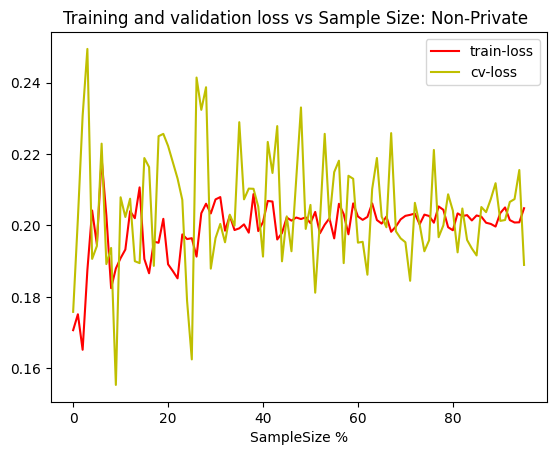

In [15]:
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Sample Size: Non-Private ")
plt.xlabel('SampleSize %')
plt.legend(loc=0)
plt.show()

#### Training and validation loss vs Varying Regularization Parameter Lambda

In [16]:
def regularization_vs_loss(regularizations, it = 50, differentially_private= False):
    train_historys = []
    cv_historys = []
    
    for r in regularizations:        
        lr_clf = LogisticRegression(x, y ,iteration = it, alpha=.1,regularization= r, differentially_private = differentially_private)
        theta, train_history, cv_history, theta_history = lr_clf.fit()
        
        train_historys.append(train_history[-1])
        cv_historys.append(cv_history[-1])  
        
    return train_historys,cv_historys

In [17]:
regularizations  = np.sort(np.linspace(0,1,10)).round(2)
print(regularizations)

[0.   0.11 0.22 0.33 0.44 0.56 0.67 0.78 0.89 1.  ]


In [18]:
#R = [.1,.2,.3,.4,.5]
train_historys,cv_historys = regularization_vs_loss(regularizations)

100%|██████████| 50/50 [00:00<00:00, 115.77it/s]


Stats: Iterations 50, Train-Loss:  0.24606095241222073, CV-Loss:  0.2468128278167122


100%|██████████| 50/50 [00:00<00:00, 121.43it/s]


Stats: Iterations 50, Train-Loss:  0.2821739982960617, CV-Loss:  0.28230903315486944


100%|██████████| 50/50 [00:00<00:00, 109.54it/s]


Stats: Iterations 50, Train-Loss:  0.31568772798175004, CV-Loss:  0.31552646086171093


100%|██████████| 50/50 [00:00<00:00, 116.91it/s]


Stats: Iterations 50, Train-Loss:  0.3449149169753004, CV-Loss:  0.3444948107730152


100%|██████████| 50/50 [00:00<00:00, 120.54it/s]


Stats: Iterations 50, Train-Loss:  0.3704982728735442, CV-Loss:  0.36984590736871203


100%|██████████| 50/50 [00:00<00:00, 116.95it/s]


Stats: Iterations 50, Train-Loss:  0.3942476404573068, CV-Loss:  0.39334704224260864


100%|██████████| 50/50 [00:00<00:00, 110.81it/s]


Stats: Iterations 50, Train-Loss:  0.413157183102452, CV-Loss:  0.4120865724367572


100%|██████████| 50/50 [00:00<00:00, 119.67it/s]


Stats: Iterations 50, Train-Loss:  0.4295832189812478, CV-Loss:  0.4283594871730827


100%|██████████| 50/50 [00:00<00:00, 111.01it/s]


Stats: Iterations 50, Train-Loss:  0.44409250129817107, CV-Loss:  0.44274870984851056


100%|██████████| 50/50 [00:00<00:00, 118.97it/s]

Stats: Iterations 50, Train-Loss:  0.45698482561749815, CV-Loss:  0.4555340745352576


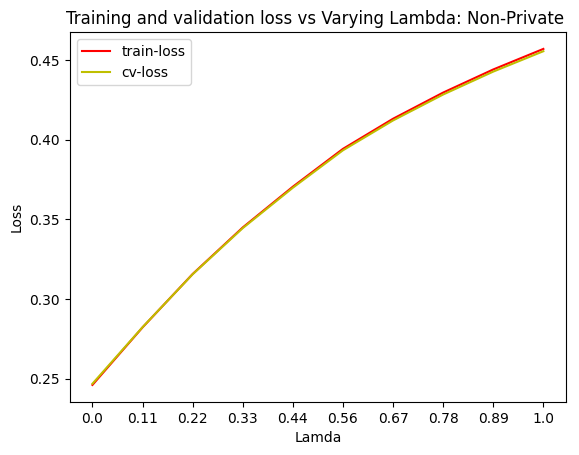

In [19]:
values = range(len(regularizations))
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Varying Lambda: Non-Private ")
plt.xlabel('Lamda')
plt.ylabel("Loss")
plt.xticks(values,regularizations)
plt.legend(loc=0)
plt.show()

In [20]:
#R = [.1,.2,.3,.4,.5]
train_historys,cv_historys = regularization_vs_loss(regularizations, differentially_private=True)

100%|██████████| 50/50 [00:00<00:00, 68.66it/s]


Stats: Iterations 50, Train-Loss:  0.24645954659127176, CV-Loss:  0.24747505518612517


100%|██████████| 50/50 [00:00<00:00, 67.10it/s]


Stats: Iterations 50, Train-Loss:  0.28216452899772626, CV-Loss:  0.28276765385451075


100%|██████████| 50/50 [00:00<00:00, 69.96it/s]


Stats: Iterations 50, Train-Loss:  0.31517606808516435, CV-Loss:  0.31489563843076596


100%|██████████| 50/50 [00:00<00:00, 69.74it/s]


Stats: Iterations 50, Train-Loss:  0.34486664293307895, CV-Loss:  0.34440821974100205


100%|██████████| 50/50 [00:00<00:00, 69.17it/s]


Stats: Iterations 50, Train-Loss:  0.3704272236266703, CV-Loss:  0.36969735557745365


100%|██████████| 50/50 [00:00<00:00, 67.64it/s]


Stats: Iterations 50, Train-Loss:  0.3943343789006614, CV-Loss:  0.393524895376664


100%|██████████| 50/50 [00:00<00:00, 66.34it/s]


Stats: Iterations 50, Train-Loss:  0.41314868432235363, CV-Loss:  0.41216016121818755


100%|██████████| 50/50 [00:00<00:00, 70.58it/s]


Stats: Iterations 50, Train-Loss:  0.4295673976592197, CV-Loss:  0.4283219515045246


100%|██████████| 50/50 [00:00<00:00, 68.29it/s]


Stats: Iterations 50, Train-Loss:  0.4441359456065939, CV-Loss:  0.4427575823557839


100%|██████████| 50/50 [00:00<00:00, 67.22it/s]

Stats: Iterations 50, Train-Loss:  0.45701318239208544, CV-Loss:  0.4556799983337935


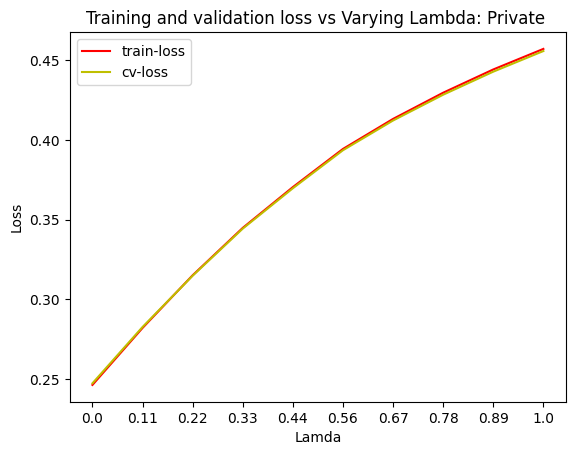

In [21]:
values = range(len(regularizations))
plt.plot(train_historys, 'r', label='train-loss')
plt.plot(cv_historys, 'y', label='cv-loss')
plt.title("Training and validation loss vs Varying Lambda: Private ")
plt.xlabel('Lamda')
plt.ylabel("Loss")
plt.xticks(values,regularizations)
plt.legend(loc=0)
plt.show()

#### Alpha vs Number of iteration to get desired amount of loss

In [22]:
itreration_list = []

alpha = 0.0
increment_value = 0.1
n_steps = 10
for i in range(0, n_steps):
    alpha = alpha + increment_value
    lr_clf = LogisticRegression(x, y ,iteration = 50 , alpha= alpha, differentially_private = True)
    lr_clf.verbose = False
    n_iteration = lr_clf.alpha_vs_iteration()
    itreration_list.append(n_iteration)

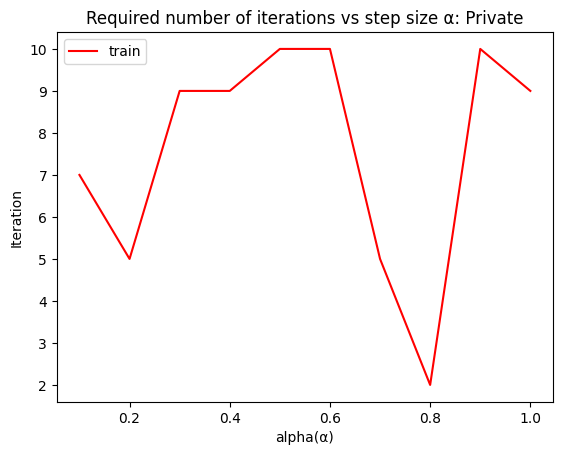

In [23]:
alpha_range = [increment_value*x for x in range(1, n_steps+1)]

plt.plot(alpha_range, itreration_list, 'r', label='train')
plt.xlabel("alpha(α)")
plt.ylabel("Iteration")
plt.title("Required number of iterations vs step size α: Private")
plt.legend(loc=0)
plt.show()

In [24]:
itreration_list = []

alpha = 0.0
increment_value = 0.1
n_steps = 10
for i in range(0, n_steps):
    alpha = alpha + increment_value
    lr_clf = LogisticRegression(x, y ,iteration = 50 , alpha= alpha, differentially_private = False)
    lr_clf.verbose = False
    n_iteration = lr_clf.alpha_vs_iteration()
    itreration_list.append(n_iteration)

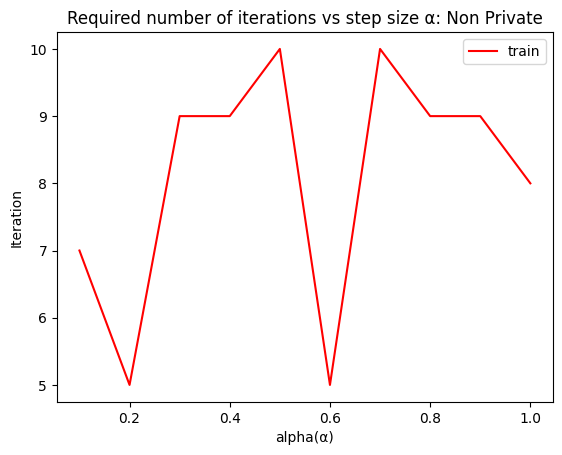

In [25]:
alpha_range = [increment_value*x for x in range(1, n_steps+1)]

plt.plot(alpha_range, itreration_list, 'r', label='train')
plt.xlabel("alpha(α)")
plt.ylabel("Iteration")
plt.title("Required number of iterations vs step size α: Non Private")
plt.legend(loc=0)
plt.show()

In [26]:
#differentially_private: Enabled
lr_clf  = LogisticRegression(x, y ,alpha=.1, differentially_private=True)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

100%|██████████| 100/100 [00:01<00:00, 66.70it/s]

Stats: Iterations 100, Train-Loss:  0.20152371204779362, CV-Loss:  0.20453495028179305


In [27]:
precision, recall, thresholds = precision_recall_curve(yt, probabilities)

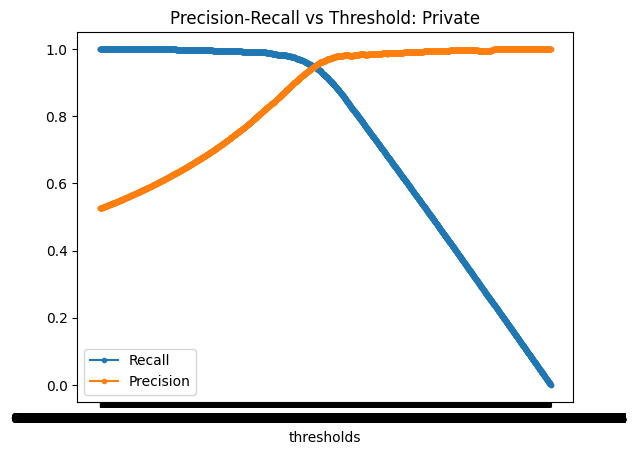

In [28]:
values = range(len(thresholds))
plt.plot(recall, marker='.', label='Recall')
plt.plot(precision, marker='.', label='Precision')
plt.xlabel('thresholds')
plt.title('Precision-Recall vs Threshold: Private')
plt.xticks(values,thresholds)
plt.legend()
plt.show()

In [29]:
#differentially_private: Disabled
lr_clf  = LogisticRegression(x, y ,alpha=.1, differentially_private=False)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

100%|██████████| 100/100 [00:00<00:00, 119.19it/s]

Stats: Iterations 100, Train-Loss:  0.201592059749545, CV-Loss:  0.20456698126893144


In [30]:
precision, recall, thresholds = precision_recall_curve(yt, probabilities)

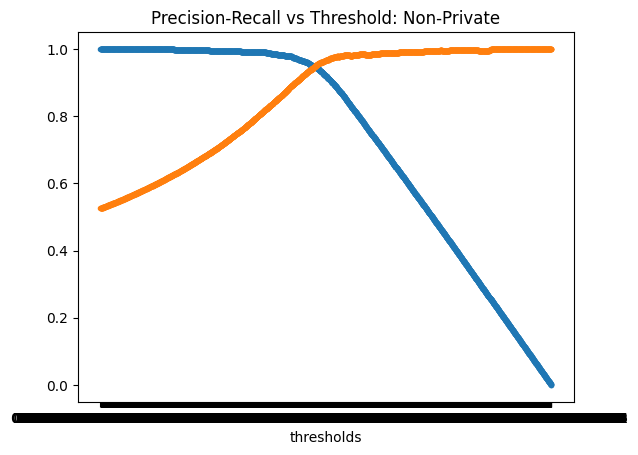

In [31]:
values = range(len(thresholds))
plt.plot(recall, marker='.', label='Recall')
plt.plot(precision, marker='.',label='Precision')
plt.xlabel('thresholds')
plt.title('Precision-Recall vs Threshold: Non-Private')
plt.xticks(values,thresholds)
plt.show()

In [32]:
def plot_roc_curve(fpr, tpr,dp):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    title = 'Receiver Operating Characteristic (ROC) Curve' 
    title += ": Private" if dp else ": Non-Private"

    plt.title(title)
    plt.legend()
    plt.show()

100%|██████████| 100/100 [00:01<00:00, 68.43it/s]


Stats: Iterations 100, Train-Loss:  0.20139380305382193, CV-Loss:  0.2044182610247196


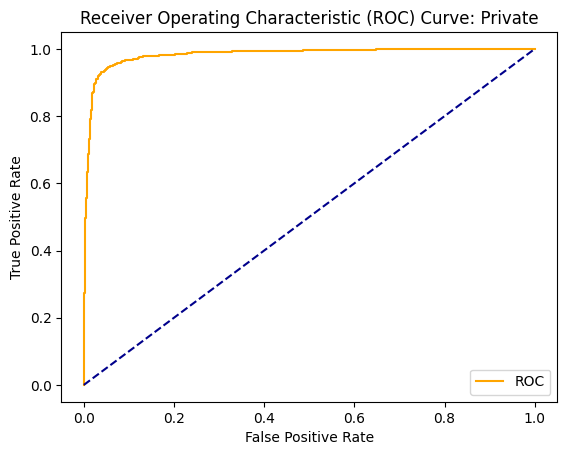

In [33]:
#differentially_private: Enabled
lr_clf  = LogisticRegression(x, y ,alpha=.1, differentially_private=True)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

fpr, tpr, thresholds = roc_curve(yt, probabilities)
plot_roc_curve(fpr, tpr, True) 

100%|██████████| 100/100 [00:00<00:00, 121.92it/s]


Stats: Iterations 100, Train-Loss:  0.20146001577717057, CV-Loss:  0.20466210425408976


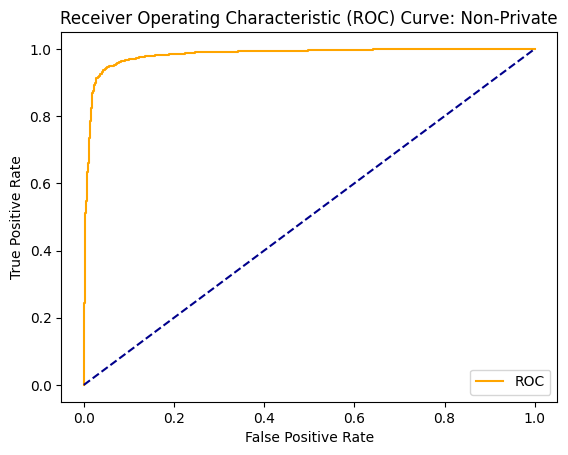

In [34]:
#differentially_private: Disabled
lr_clf  = LogisticRegression(x, y ,alpha=.1, differentially_private=False)
theta, train_history, cv_history, theta_history = lr_clf.fit(verbose=False)
accuracy, probabilities, prediction = lr_clf.predict(xt,yt)

fpr, tpr, thresholds = roc_curve(yt, probabilities)
plot_roc_curve(fpr, tpr, False) 